 ## Wine Quality Data Visualization
----
 ### Overview

This project aims to explore and visualize the characteristics of wine quality using various data visualization techniques. The dataset used contains information on different attributes of red wine and their corresponding quality ratings. This notebook demonstrates how to create insightful visualizations to better understand the relationships and distributions within the data.

----
 ### Objective

The primary objectives of this project are:

- To visualize the distribution of wine quality.
- To explore the relationship between different wine features and their quality.
- To use advanced visualization techniques to gain deeper insights into the data.
-----
 ### Data Description

The dataset used in this project is the "Wine Quality" dataset, which contains information about various physicochemical properties of red wine and their quality ratings. The dataset has the following columns:

- fixed acidity: The amount of fixed acidity in the wine.
- volatile acidity: The amount of volatile acidity in the wine.
- citric acid: The amount of citric acid in the wine.
- residual sugar: The amount of residual sugar in the wine.
- chlorides: The amount of chlorides in the wine.
- free sulfur dioxide: The amount of free sulfur dioxide in the wine.
- total sulfur dioxide: The amount of total sulfur dioxide in the wine.
- density: The density of the wine.
- pH: The pH of the wine.
- sulphates: The amount of sulphates in the wine.
- alcohol: The alcohol content of the wine.
- quality: The quality rating of the wine (target variable).

 ### Steps and Methodology
-------
- Data Loading and Preprocessing
- Load the dataset and check for missing values.
- Prepare the data for analysis and visualization.
- Exploratory Data Analysis (EDA)
- Create a correlation heatmap to understand the relationships between different features.
- Plot feature importances using a Random Forest model to identify which features most influence the wine quality.
- Apply Principal Component Analysis (PCA) to reduce dimensionality and visualize the data in a lower-dimensional space.
----
 ### Data Visualization
- Create a violin plot to show the distribution of fixed acidity by wine quality.
- Generate a radial bar chart to display the distribution of wine quality ratings.
- Produce an interactive scatter plot to explore the relationship between alcohol content and    volatile acidity, colored by wine quality.

------
 ### Visualizations
- Correlation Heatmap
A heatmap displaying the correlation matrix of the wine features, highlighting relationships between features.
- Feature Importance
A bar plot showing the importance of each feature in predicting wine quality using a Random Forest model.
- PCA Plot
A scatter plot showing the results of PCA, illustrating how different wine samples are distributed in a lower-dimensional space.
- Violin Plot
A violin plot demonstrating the distribution of fixed acidity across different wine quality ratings.
- Radial Bar Chart
A radial bar chart representing the distribution of wine quality ratings.
- Interactive Scatter Plot
An interactive scatter plot exploring the relationship between alcohol content and volatile acidity, colored by wine quality.


---



In [149]:
# Pandas library for data manipulation using DataFrame structures
import pandas as pd  
# Numpy for mathematical operations and handling multidimensional arrays
import numpy as np 
# Seaborn for data visualization (built on top of matplotlib with more aesthetic plots)
import seaborn as sns  
# Matplotlib for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt  
# RandomForestClassifier from scikit-learn for building a random forest model
from sklearn.ensemble import RandomForestClassifier  
# StandardScaler to standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler   
# PCA for Principal Component Analysis, used for dimensionality reduction
from sklearn.decomposition import PCA  
import plotly.express as px 


In [151]:
def load_data(file_path):
    """
    Loads the dataset from a CSV file.
    
    Args:
    file_path (str): The path to the CSV file.
    
    Returns:
    pd.DataFrame: Loaded dataset.
    """
    return pd.read_csv(file_path)

def check_missing_values(df):
    """
    Checks for missing values in the dataset.
    
    Args:
    df (pd.DataFrame): The dataset to check.
    
    Returns:
    pd.Series: A series showing the count of missing values per column.
    """
    return df.isnull().sum()

def main():
    # Load the dataset
    data = load_data('winequality-red.csv')
    
    # Check for missing values
    missing_values = check_missing_values(data)
    print(missing_values)

# Run the main function
if __name__ == "__main__":
    main()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [75]:
def compute_correlation_matrix(df):
    """
    Computes the correlation matrix of the dataset.
    
    Args:
    df (pd.DataFrame): The dataset for which to compute the correlation matrix.
    
    Returns:
    pd.DataFrame: Correlation matrix.
    """
    return df.corr()

corr_matrix = compute_correlation_matrix(data)
print(corr_matrix)


                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

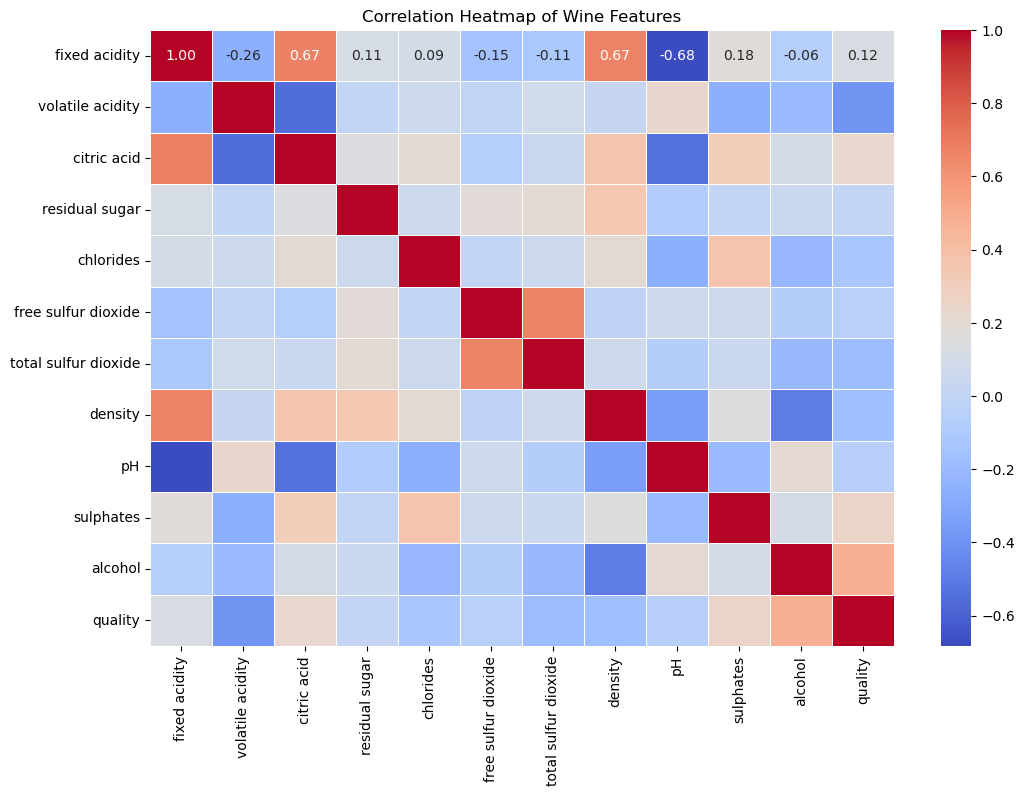

In [77]:
def plot_heatmap(corr_matrix):
    """
    Plots a heatmap of the correlation matrix.
    
    Args:
    corr_matrix (pd.DataFrame): The correlation matrix to plot.
    """
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Heatmap of Wine Features')
    plt.show()

# Example usage for this section
plot_heatmap(corr_matrix)

In [81]:
def train_random_forest(X, y):
    """
    Trains a Random Forest classifier on the dataset.
    
    Args:
    X (pd.DataFrame): Features.
    y (pd.Series): Target variable.
    
    Returns:
    RandomForestClassifier: Trained Random Forest model.
    """
    model = RandomForestClassifier()
    model.fit(X, y)
    return model

X = data.drop('quality', axis=1)
y = data['quality']
model = train_random_forest(X, y)


In [83]:
def get_feature_importances(model, feature_names):
    """
    Gets the feature importances from the trained model.
    
    Args:
    model (RandomForestClassifier): Trained Random Forest model.
    feature_names (pd.Index): Feature names.
    
    Returns:
    pd.DataFrame: DataFrame of features and their importance scores.
    """
    importances = model.feature_importances_
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    return importance_df.sort_values(by='Importance', ascending=False)

importance_df = get_feature_importances(model, X.columns)
print(importance_df)


                 Feature  Importance
10               alcohol    0.146154
9              sulphates    0.112253
1       volatile acidity    0.104769
6   total sulfur dioxide    0.103185
7                density    0.093166
4              chlorides    0.083162
8                     pH    0.074509
2            citric acid    0.073500
0          fixed acidity    0.072908
3         residual sugar    0.069785
5    free sulfur dioxide    0.066609


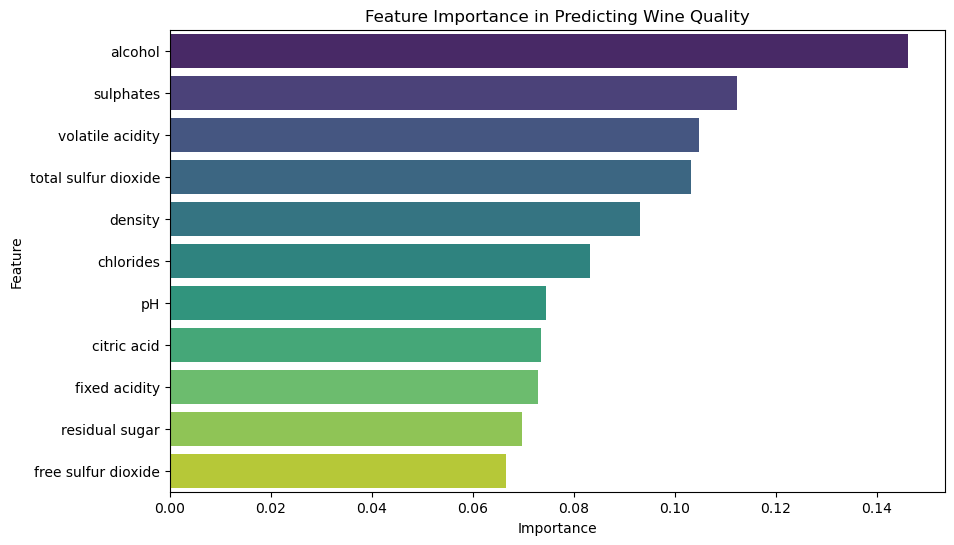

In [85]:
def plot_feature_importances(importance_df):
    """
    Plots the feature importances as a bar plot.
    
    Args:
    importance_df (pd.DataFrame): DataFrame containing features and their importance scores.
    """
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
    plt.title('Feature Importance in Predicting Wine Quality')
    plt.show()

plot_feature_importances(importance_df)


In [87]:
def standardize_data(X):
    """
    Standardizes the features using StandardScaler.
    
    Args:
    X (pd.DataFrame): Features to standardize.
    
    Returns:
    np.ndarray: Scaled features.
    """
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

# Example usage for this section
X_scaled = standardize_data(X)


In [89]:
def apply_pca(X_scaled, n_components=2):
    """
    Applies PCA to reduce dimensionality.
    
    Args:
    X_scaled (np.ndarray): Standardized features.
    n_components (int): Number of principal components to keep.
    
    Returns:
    np.ndarray: PCA-transformed features.
    """
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    return X_pca

# Example usage for this section
X_pca = apply_pca(X_scaled)


In [91]:
def create_pca_df(X_pca, y):
    """
    Creates a DataFrame containing the PCA results and the target variable.
    
    Args:
    X_pca (np.ndarray): PCA-transformed features.
    y (pd.Series): Target variable (e.g., quality).
    
    Returns:
    pd.DataFrame: DataFrame with PCA components and target variable.
    """
    pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
    pca_df['Quality'] = y.values
    return pca_df

pca_df = create_pca_df(X_pca, y)


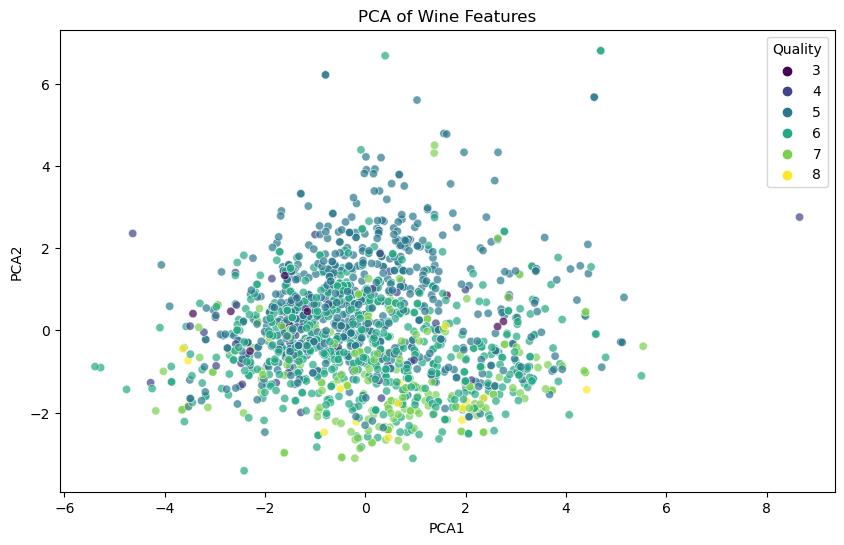

In [93]:
def plot_pca_results(pca_df):
    """
    Plots the PCA results as a scatter plot.
    
    Args:
    pca_df (pd.DataFrame): DataFrame containing PCA results and target variable.
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='PCA1', y='PCA2', hue='Quality', data=pca_df, palette='viridis', alpha=0.7)
    plt.title('PCA of Wine Features')
    plt.show()


plot_pca_results(pca_df)


In [105]:
def plot_alcohol_by_quality(data):
    """
    Plots a box plot of alcohol content by wine quality.
    
    Args:
    data (pd.DataFrame): The dataset containing wine features.
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='quality', y='alcohol', data=data, palette='viridis')
    plt.title('Distribution of Alcohol Content by Wine Quality')
    plt.show()

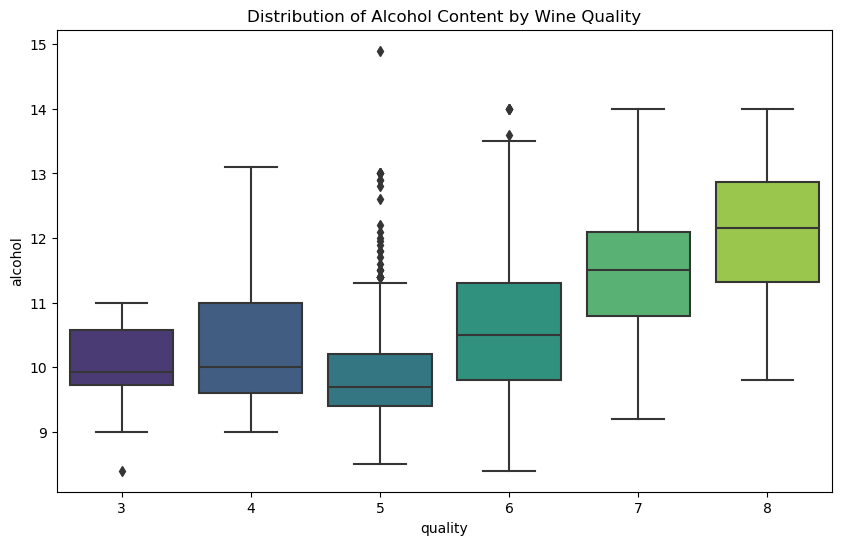

In [107]:
# Example usage for this section
plot_alcohol_by_quality(data)

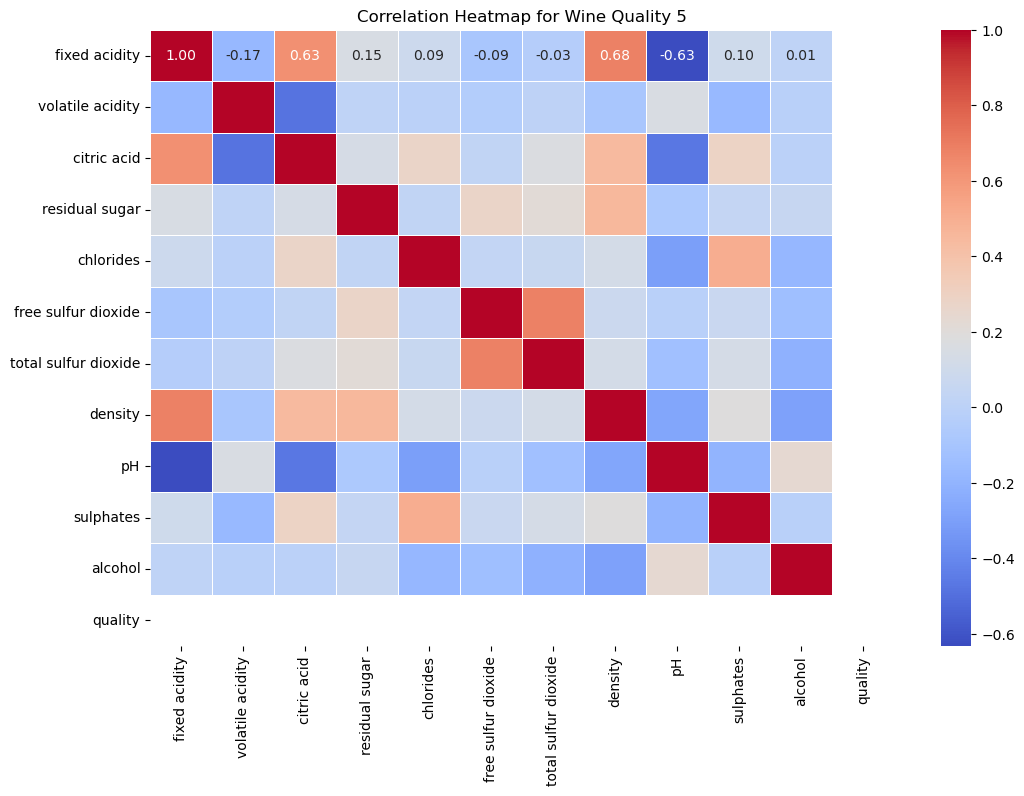

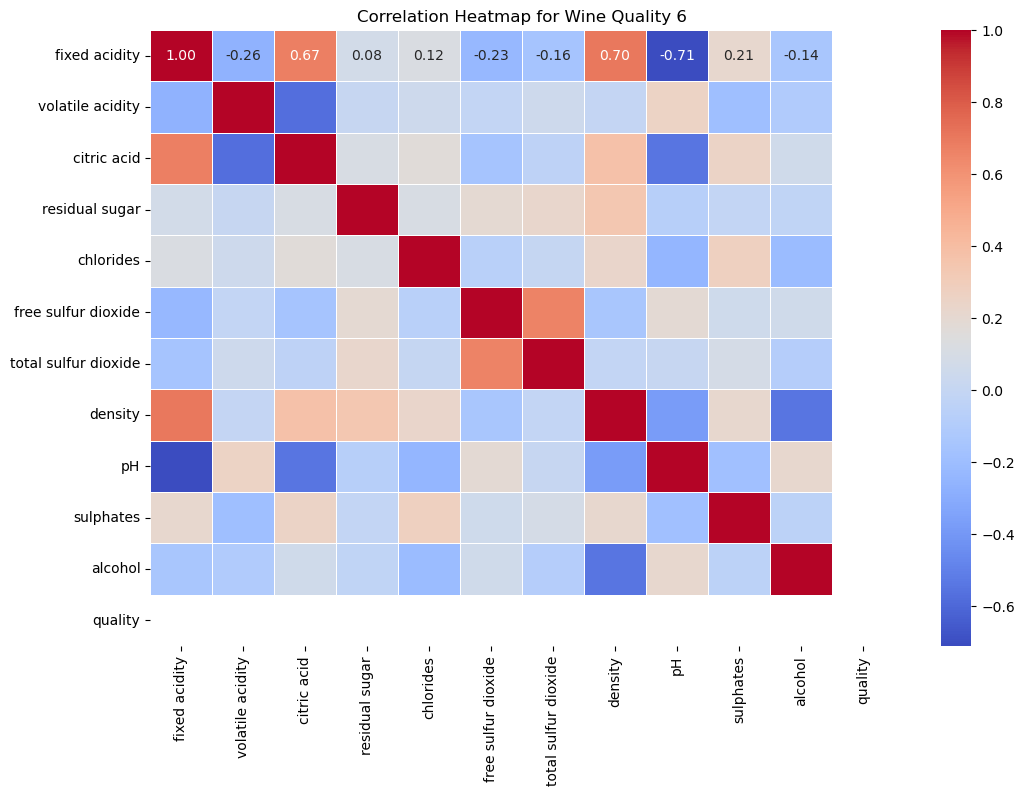

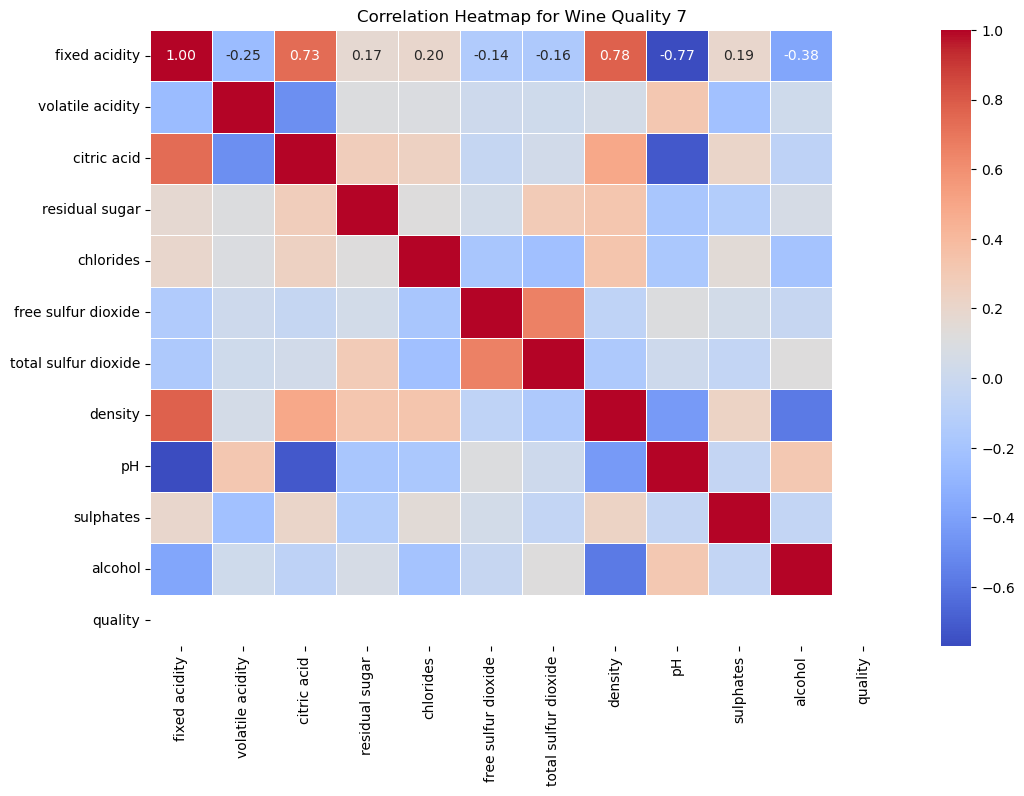

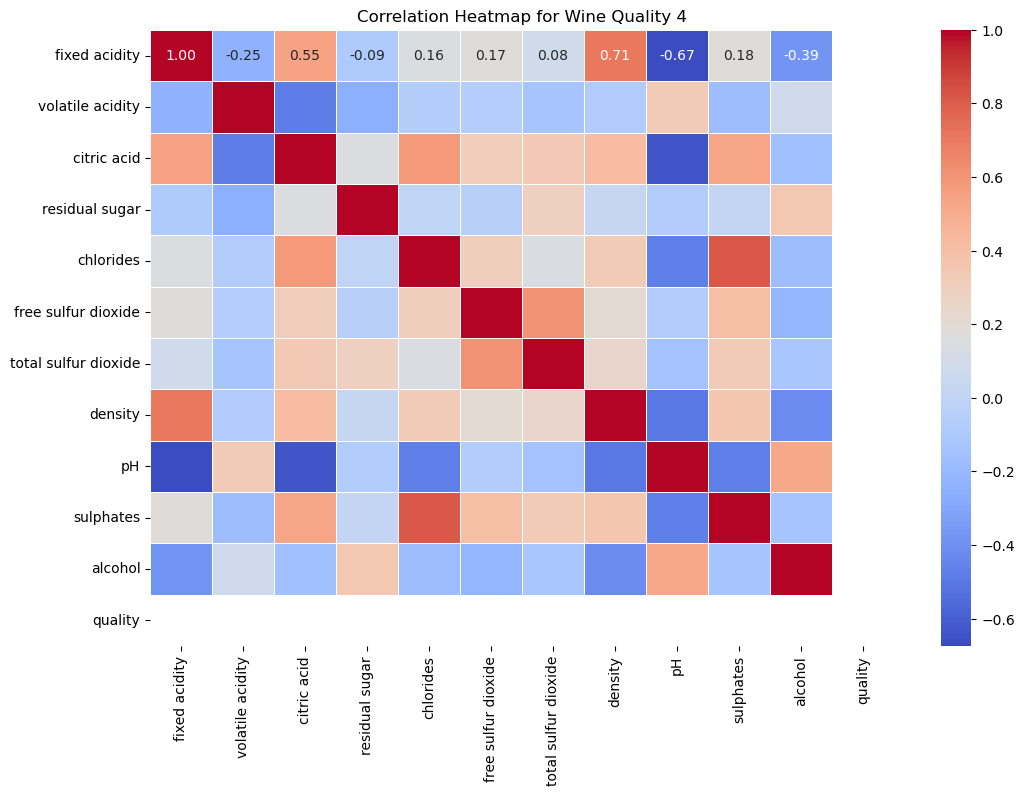

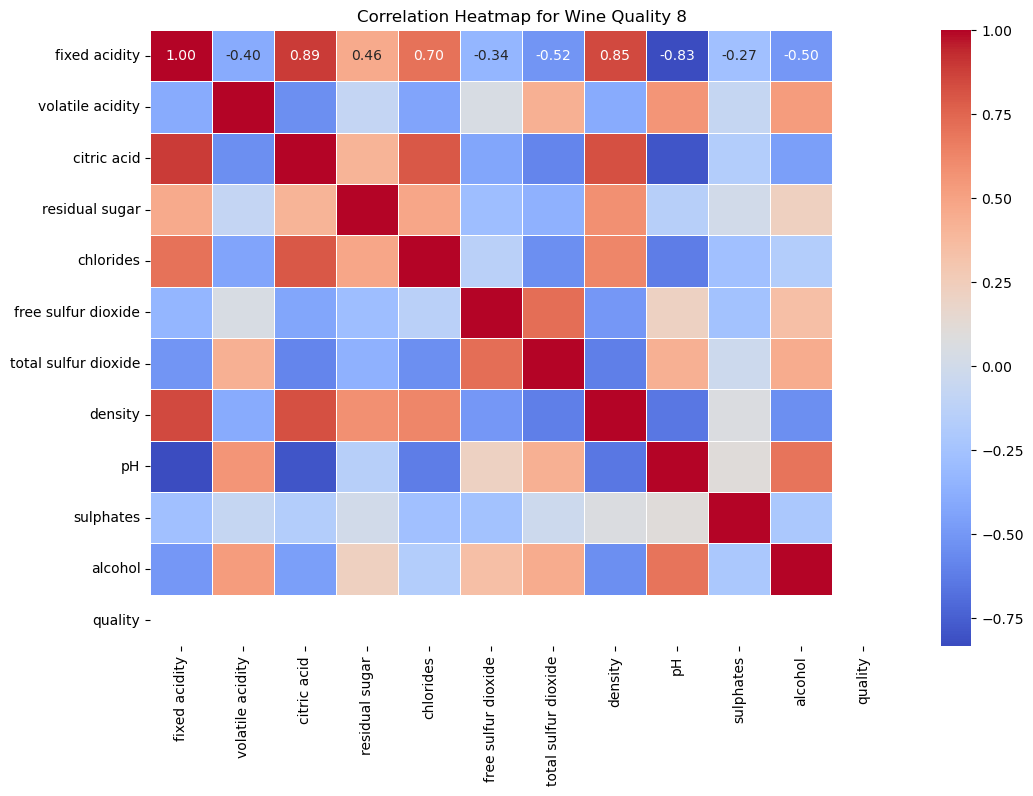

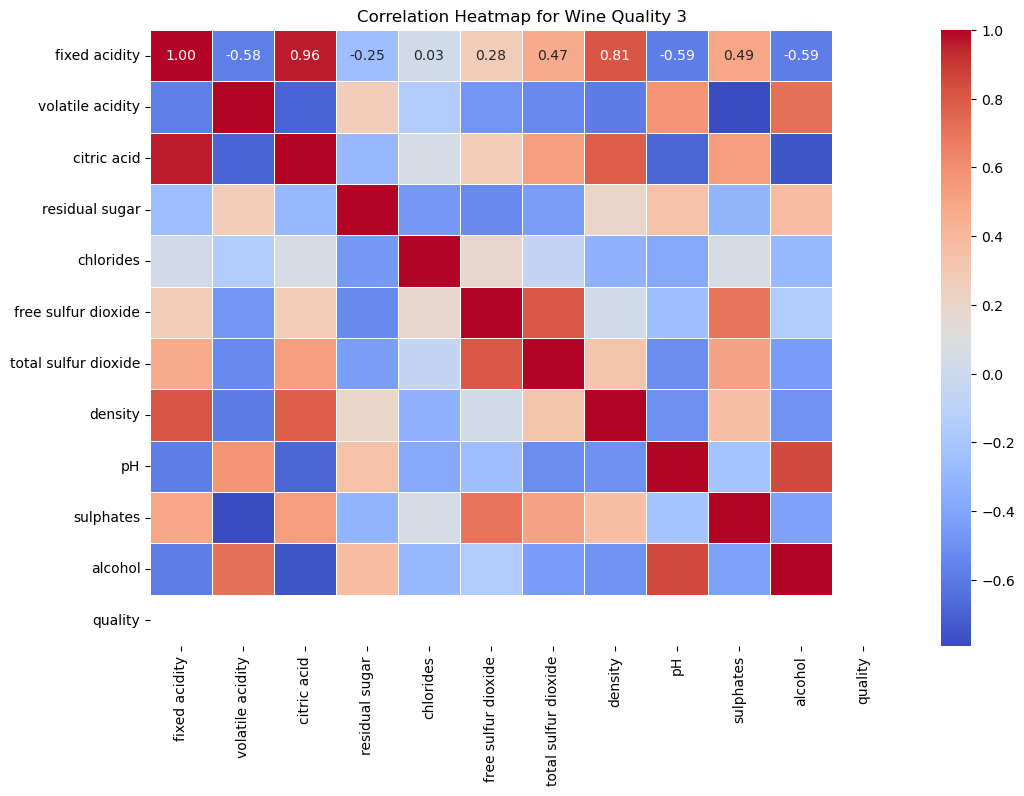

In [109]:
# Compute the correlation matrix for each quality level
for quality in data['quality'].unique():
    subset = data[data['quality'] == quality]
    corr_subset = subset.corr()
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_subset, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title(f'Correlation Heatmap for Wine Quality {quality}')
    plt.show()


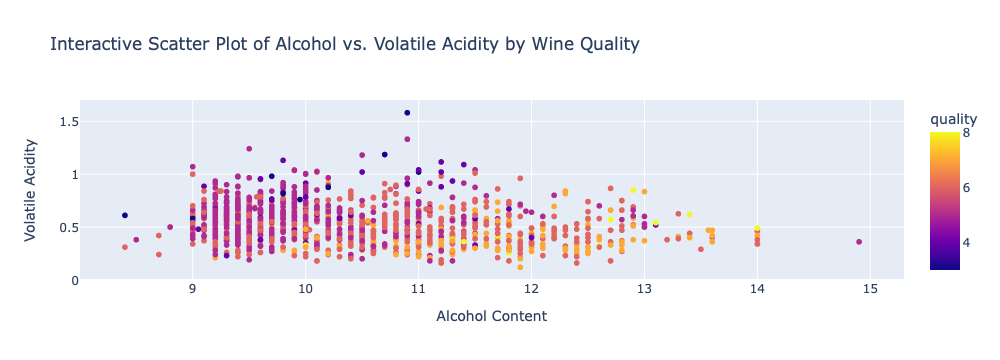

In [111]:
def plot_interactive_scatter(data):
    """
    Creates an interactive scatter plot of alcohol content vs volatile acidity, colored by wine quality.
    
    Args:
    data (pd.DataFrame): The dataset containing wine features.
    """
    fig = px.scatter(
        data, 
        x='alcohol', 
        y='volatile acidity', 
        color='quality',
        title='Interactive Scatter Plot of Alcohol vs. Volatile Acidity by Wine Quality',
        labels={'alcohol': 'Alcohol Content', 'volatile acidity': 'Volatile Acidity'}
    )
    fig.show()

# Example usage for this section
plot_interactive_scatter(data)



In [ ]:
### 

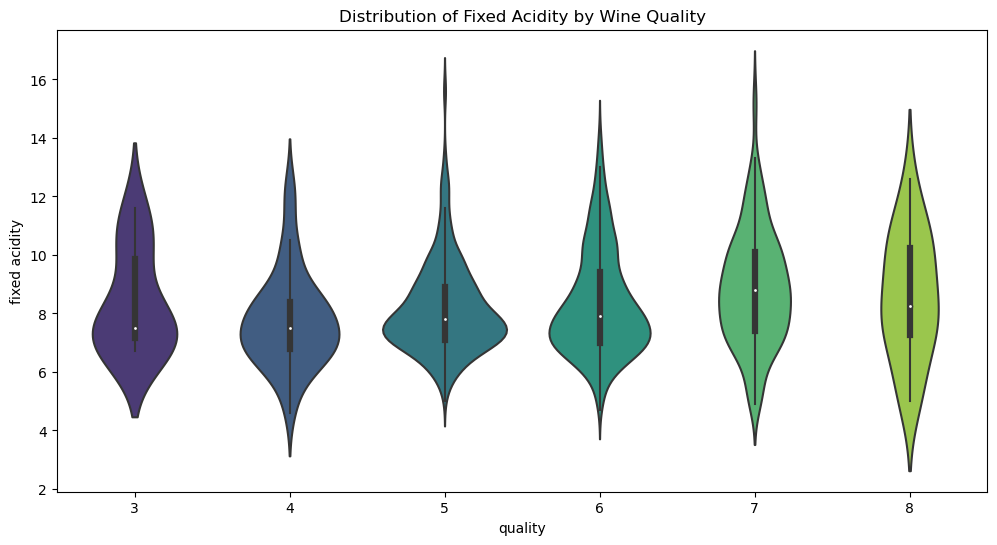

In [141]:
def plot_violin_fixed_acidity(data):
    """
    Creates a violin plot to show the distribution of fixed acidity by wine quality.
    
    Args:
    data (pd.DataFrame): The dataset containing wine features.
    """
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='quality', y='fixed acidity', data=data, palette='viridis')
    plt.title('Distribution of Fixed Acidity by Wine Quality')
    plt.show()

# Plot violin fixe acidity
plot_violin_fixed_acidity(data)


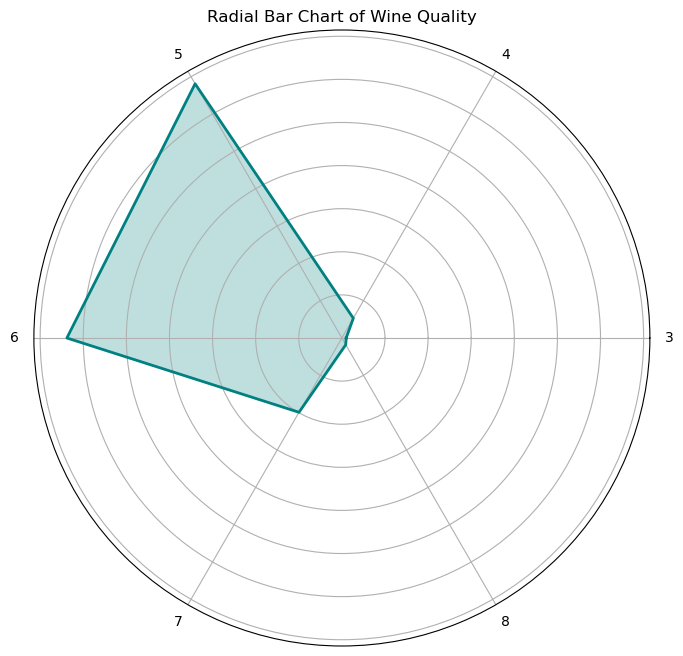

In [121]:
def plot_radial_bar_chart(data):
    """
    Creates a radial bar chart to show the distribution of wine quality.
    
    Args:
    data (pd.DataFrame): The dataset containing wine features.
    """
    # Data preparation for radial bar chart
    quality_counts = data['quality'].value_counts().sort_index()
    categories = quality_counts.index
    values = quality_counts.values

    # Radial bar chart
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    values = np.concatenate((values, [values[0]]))  # Close the loop
    angles += angles[:1]  # Close the loop

    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color='teal', alpha=0.25)
    ax.plot(angles, values, color='teal', linewidth=2)
    
    # Formatting
    ax.set_yticklabels([])  # Remove radial axis labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)  # Set the category labels
    
    plt.title('Radial Bar Chart of Wine Quality')
    plt.show()

# Plot radial bar chart 
plot_radial_bar_chart(data)
